In [ ]:
#PROBLEM STATEMENT

#Employee attrition is a major concern for organizations as it directly impacts productivity, cost, and team stability. 
#The goal of this project is to analyze HR data to understand the factors influencing employee attrition and to build a basic machine learning model that can predict whether an employee is likely to leave the organization.

In [ ]:
#STEP 1  LOAD THE LIBRARIES

#Import all the necessary Python libraries for data handling, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


sns.set_style('whitegrid')

In [2]:
import os 
os.getcwd()

'C:\\Users\\sarve\\Sarvesh and AI'

In [3]:
os.chdir("C:\\STUDY\\UPSHOT\\HR ANALYTICS\\")

In [ ]:
#STEP 2 LOAD THE DATASET

#load the HR Analytics dataset into a pandas DataFrame and perform an initial inspection to understand its structure

In [4]:
df = pd.read_csv('general_data.csv')

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
#STEP 3 DATA CLEANING

#This step focuses on identifying and handling missing values, duplicate records, and irrelevant columns that do not contribute to analysis.

In [5]:
df.isnull().sum()

df = df.dropna()

cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
#STEP 4 EDA

#EDA helps us understand patterns, trends, and relationships in the data, especially with respect to employee attrition.

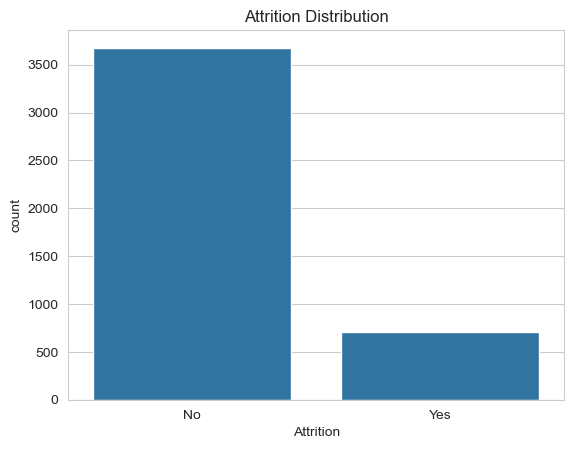

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

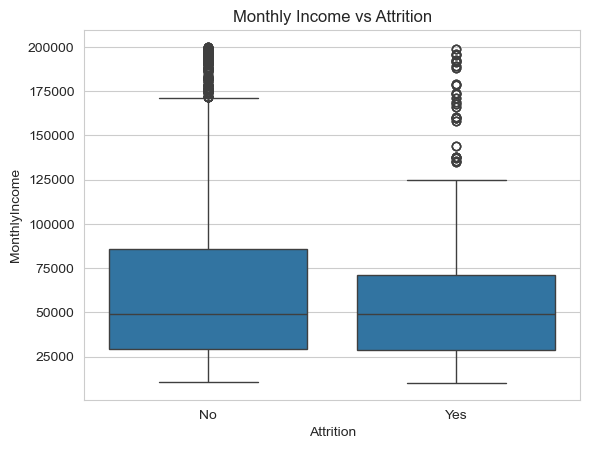

In [7]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

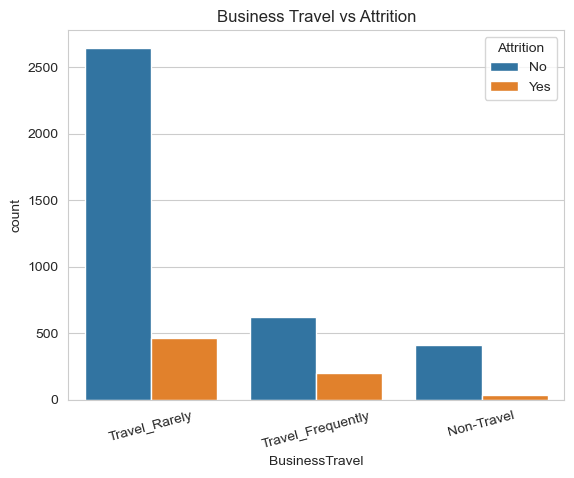

In [11]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Business Travel vs Attrition')
plt.xticks(rotation=15)
plt.show()

In [ ]:
#STEP 5 FEATURE SELECTION AND TARGET VARIABLE

#separate: Attrition as the target , everything else as input features

In [12]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
#STEP 6 IDENTIFY NUMERICAL AND CATEGORICAL COLUMNS

#identify: numerical columns (to scale) , categorical columns (to encode)

In [13]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

print("Numerical features:", len(num_features))
print("Categorical features:", len(cat_features))

Numerical features: 14
Categorical features: 6


In [ ]:
#STEP 7 PREPROCESSING PIPELINE

#Scales numerical data
#One-hot encodes categorical data
#Keeps everything clean and reproducible

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [ ]:
#STEP 8 

#keep unseen data to test how well the model generalizes.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#STEP 9 LOGISTIC REGRESSION

#Logistic Regression is a strong baseline for binary classification like attrition

In [16]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
#STEP 10 MODEL EVALUATION

#PRECISION
#RECALL
#F1-SCORE
#CONFUSION MATRIX

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       736
           1       0.72      0.09      0.16       141

    accuracy                           0.85       877
   macro avg       0.79      0.54      0.54       877
weighted avg       0.83      0.85      0.80       877



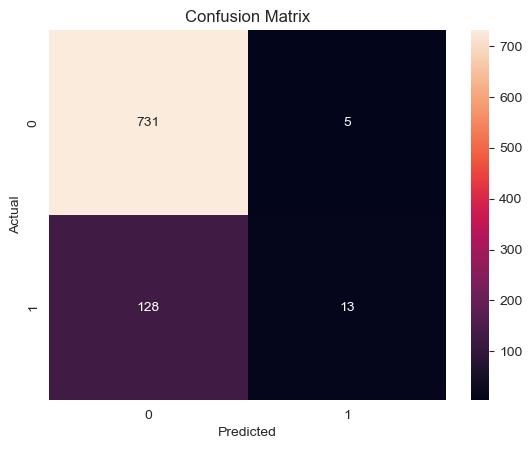

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()